In [1]:
from sys import path
path.append('../3DAssignmentSolver')

from main import Solver
from gurobi_solver import GurobiSolver
from pulp_solver import PulpSolver
from utils import create_problems, benchmark, duality_visualizer

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
N = 25
num_problems = 10

solver1 = Solver(learning_rate_scale="1/k", algorithm="nesterov", beta=0.95, search_size=10, learning_rate=0.1, max_iterations=1000, threshold=0.05)
solver2 = Solver(learning_rate_scale="constant", algorithm="subgradient", beta=0, search_size=10, learning_rate=0.1, max_iterations=1000, threshold=0.05)
solver3 = PulpSolver()
solver4 = GurobiSolver('/Users/jetchung/gurobi.json')

solvers = [solver1, solver2, solver3, solver4]
problems = create_problems(N, num_problems, verbosity = True)

df = benchmark(problems, solvers, verbosity = True)

--------------------------------------------------
Created 10 problem instances for size 25 with scale=100.
Using a uniform distribution (beta = (1, 1)).
--------------------------------------------------


--------------------------------------------------
Benchmarking CustomSolver_1 Solver:
--------------------------------------------------
Instance 1: Objective Value: 2374.34, Duality % Gap: 4.89%
Instance 2: Objective Value: 2385.58, Duality % Gap: 4.48%
Instance 3: Objective Value: 2404.48, Duality % Gap: 3.54%
Instance 4: Objective Value: 2350.59, Duality % Gap: 5.90%
Instance 5: Objective Value: 2388.74, Duality % Gap: 4.26%
Instance 6: Objective Value: 2381.01, Duality % Gap: 4.58%
Instance 7: Objective Value: 2412.95, Duality % Gap: 3.26%
Instance 8: Objective Value: 2382.74, Duality % Gap: 4.63%
Instance 9: Objective Value: 2406.09, Duality % Gap: 3.54%
Instance 10: Objective Value: 2409.09, Duality % Gap: 3.41%
--------------------------------------------------
Avg. executio

In [3]:
df

,CustomSolver_1,CustomSolver_2,PulpSolver_3,GurobiSolver_4
1,0.942399,1.035306,9.478826,8.731836
2,0.073572,0.553283,7.294022,8.258035
3,0.188026,0.486206,5.396607,5.326937
4,0.917457,0.882682,10.279789,4.711772
5,0.061411,0.140296,5.738086,3.350042
6,0.271235,0.706310,7.630233,3.602126
7,0.623564,0.943640,7.229187,3.003551
8,0.044848,0.132787,10.261689,3.076647
9,0.046971,0.289078,10.054597,2.636898
10,0.073076,0.113758,13.699080,2.245241


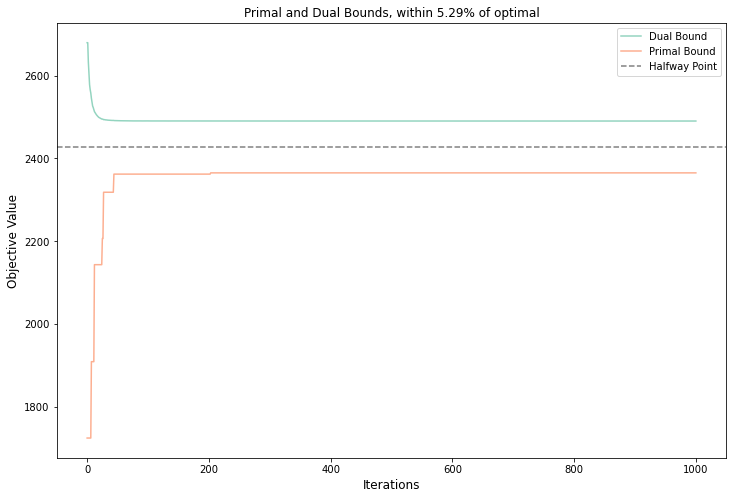

In [4]:
# visualizing how the primal dual method works
dual_bounds, primal_bounds, _, _, _, _ = solver1.optimize(problems[0])
duality_visualizer(dual_bounds, primal_bounds, (12, 8))

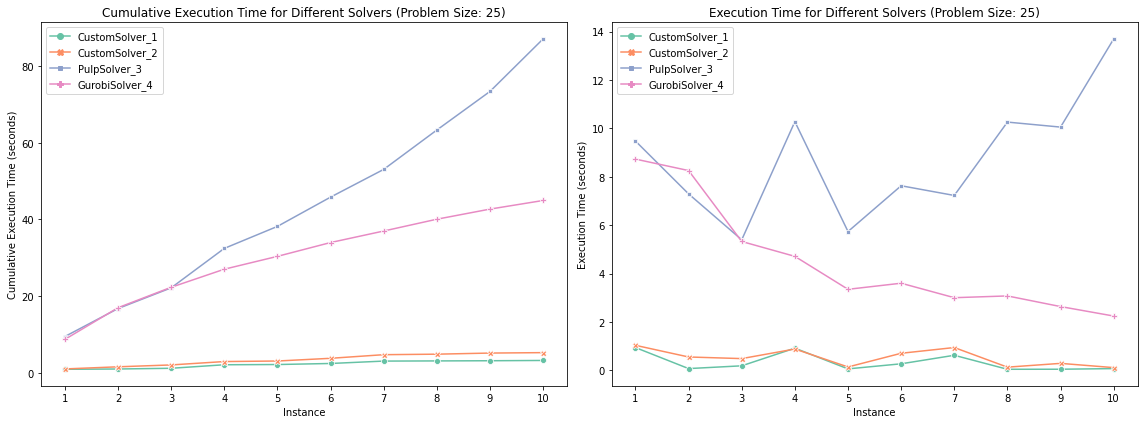

In [5]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the first graph on the first subplot
sns.lineplot(data=df.cumsum(), dashes=False, markers=True, palette="Set2", ax=axes[0])
axes[0].set_xlabel("Instance")
axes[0].set_xticks(np.arange(1, num_problems + 1, 1))
axes[0].set_ylabel("Cumulative Execution Time (seconds)")
axes[0].set_title(f"Cumulative Execution Time for Different Solvers (Problem Size: {N})")
axes[0].legend()

# Plot the second graph on the second subplot
sns.lineplot(data=df, dashes=False, markers=True, palette="Set2", ax=axes[1])
axes[1].set_xlabel("Instance")
axes[1].set_xticks(np.arange(1, num_problems + 1, 1))
axes[1].set_ylabel("Execution Time (seconds)")
axes[1].set_title(f"Execution Time for Different Solvers (Problem Size: {N})")
axes[1].legend()

plt.tight_layout()
plt.show()


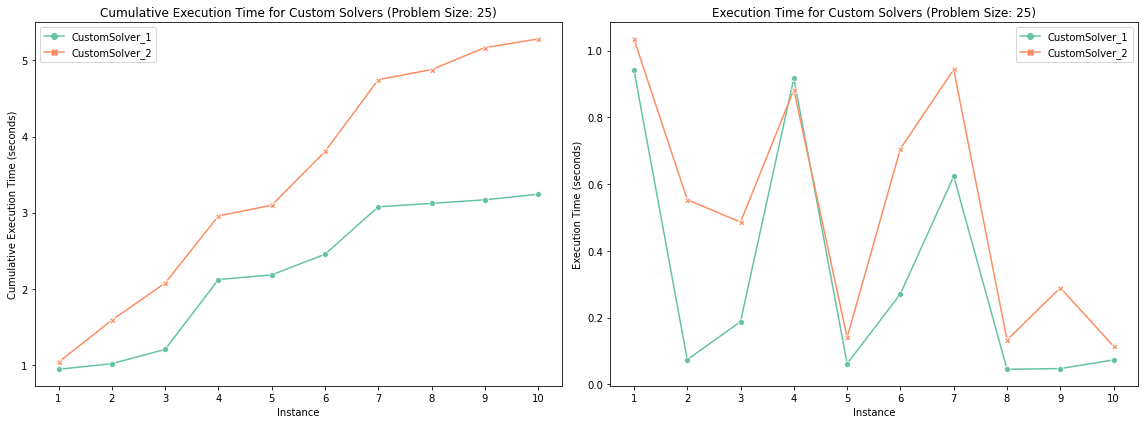

In [6]:
df_subset = df.iloc[:, :2] 

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the first graph on the first subplot
sns.lineplot(data=df_subset.cumsum(), dashes=False, markers=True, palette="Set2", ax=axes[0])
axes[0].set_xlabel("Instance")
axes[0].set_xticks(np.arange(1, num_problems + 1, 1))
axes[0].set_ylabel("Cumulative Execution Time (seconds)")
axes[0].set_title(f"Cumulative Execution Time for Custom Solvers (Problem Size: {N})")
axes[0].legend()

# Plot the second graph on the second subplot
sns.lineplot(data=df_subset, dashes=False, markers=True, palette="Set2", ax=axes[1])
axes[1].set_xlabel("Instance")
axes[1].set_xticks(np.arange(1, num_problems + 1, 1))
axes[1].set_ylabel("Execution Time (seconds)")
axes[1].set_title(f"Execution Time for Custom Solvers (Problem Size: {N})")
axes[1].legend()

plt.tight_layout()
plt.show()


In [9]:
N = 50
num_problems = 10

solver1 = Solver(learning_rate_scale="1/k", algorithm="nesterov", beta=0.95, search_size=10, learning_rate=0.1, max_iterations=1000, threshold=0.05)
solver2 = Solver(learning_rate_scale="constant", algorithm="subgradient", beta=0, search_size=10, learning_rate=0.1, max_iterations=1000, threshold=0.05)
solver3 = GurobiSolver('/Users/jetchung/gurobi.json')

solvers = [solver1, solver2, solver3]
problems = create_problems(N, num_problems, verbosity = True)

df = benchmark(problems, solvers, verbosity = True)

--------------------------------------------------
Created 10 problem instances for size 50 with scale=100.
Using a uniform distribution (beta = (1, 1)).
--------------------------------------------------


--------------------------------------------------
Benchmarking CustomSolver_1 Solver:
--------------------------------------------------
Instance 1: Objective Value: 4797.89, Duality % Gap: 4.12%
Instance 2: Objective Value: 4736.26, Duality % Gap: 5.47%
Instance 3: Objective Value: 4794.74, Duality % Gap: 4.17%
Instance 4: Objective Value: 4762.12, Duality % Gap: 4.90%
Instance 5: Objective Value: 4717.00, Duality % Gap: 5.90%
Instance 6: Objective Value: 4842.81, Duality % Gap: 3.14%
Instance 7: Objective Value: 4734.61, Duality % Gap: 5.50%
Instance 8: Objective Value: 4812.30, Duality % Gap: 3.82%
Instance 9: Objective Value: 4748.74, Duality % Gap: 5.19%
Instance 10: Objective Value: 4740.36, Duality % Gap: 5.38%
--------------------------------------------------
Avg. executio